In [126]:
import pymysql
import pandas as pd

conn=pymysql.connect(host='localhost', user='root', password='1234', db='population', charset='utf8')
cur = conn.cursor()
cur.execute('select * from total where category="전체" and level in ("초등학교 (억원)","중학교 (억원)","고등학교 (억원)");')
rows=cur.fetchall() # 결과 집합 처리
DF=pd.DataFrame(rows) # DataFrame으로 변환

In [127]:
DF
# 0~9 : 초등학교
# 10~19 : 중학교
# 20~29 : 고등학교

,0,1,2,3
0,초등학교 (억원),2013,전체,77375
1,초등학교 (억원),2014,전체,75949
2,초등학교 (억원),2015,전체,75287
3,초등학교 (억원),2016,전체,77438
4,초등학교 (억원),2017,전체,81311
5,초등학교 (억원),2018,전체,85531
6,초등학교 (억원),2019,전체,95597
7,초등학교 (억원),2020,전체,76107
8,초등학교 (억원),2021,전체,105279
9,초등학교 (억원),2022,전체,119055


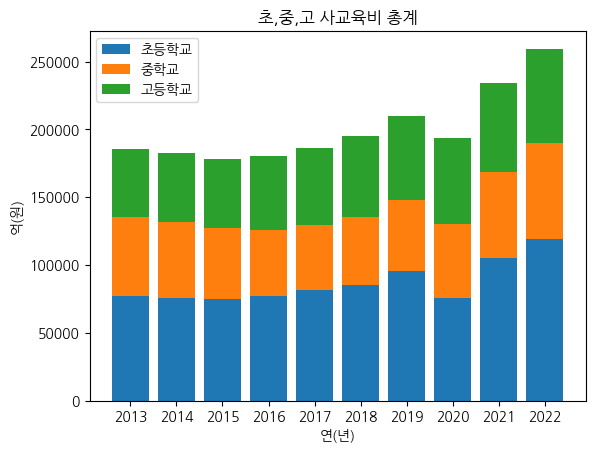

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from matplotlib.ticker import FuncFormatter
y1=DF.iloc[0:10,3]
y2=DF.iloc[10:20,3]
y3=DF.iloc[20:30,3]

plt.bar(range(10),y1,label='초등학교')
plt.bar(range(10),y2,bottom=y1,label='중학교')
plt.bar(range(10),y3,bottom=y1.reset_index(drop=True)+y2.reset_index(drop=True),label='고등학교')
plt.title("초,중,고 사교육비 총계")
plt.xlabel("연(년)")
plt.ylabel("억(원)")
plt.xticks(range(10),[i for i in range(2013,2023)])
plt.legend()
plt.show()
# 전체적으로 높아지는 양상을 보임
# 학령 인구는 감소하는데, 왜 사교육비는 높아질까?

In [129]:
# 그 이유를 가구원 수와 가구당 월평균 가계수지에서 바라보았다
household=pd.read_csv("./Data/household.csv")
income=pd.read_csv("./Data/income.csv")

In [130]:
household.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
household.drop(index=[0,7], axis=0, inplace=True)
household.replace("-",0, inplace=True)

In [131]:
for col in household.columns[1:]:
    household[col] = household[col].astype(float)

In [132]:
household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 1 to 6
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 1  6 non-null      object 
 1   1970        6 non-null      float64
 2   1980        6 non-null      float64
 3   1990        6 non-null      float64
 4   2000        6 non-null      float64
 5   2010        6 non-null      float64
 6   2015        6 non-null      float64
 7   2016        6 non-null      float64
 8   2017        6 non-null      float64
 9   2018        6 non-null      float64
 10  2019        6 non-null      float64
 11  2020        6 non-null      float64
 12  2021        6 non-null      float64
 13  2022        6 non-null      float64
dtypes: float64(13), object(1)
memory usage: 804.0+ bytes


In [133]:
household

,Unnamed: 1,1970,1980,1990,2000,2010,2015,2016,2017,2018,2019,2020,2021,2022
1,1인가구,0.0,4.8,9.0,15.5,23.9,27.2,27.9,28.6,29.3,30.2,31.7,33.4,34.5
2,2인가구,9.7,10.5,13.8,19.1,24.3,26.1,26.2,26.7,27.3,27.8,28.0,28.3,28.8
3,3인가구,13.3,14.5,19.1,20.9,21.3,21.5,21.4,21.2,21.0,20.7,20.1,19.4,19.2
4,4인가구,15.5,20.3,29.5,31.1,22.5,18.8,18.3,17.7,17.0,16.2,15.6,14.7,13.8
5,5인가구,17.7,20.0,18.8,10.1,6.2,4.9,4.8,4.5,4.3,3.9,3.6,3.3,3.1
6,6인 이상가구,43.8,29.8,9.8,3.3,1.8,1.5,1.4,1.3,1.2,1.0,0.9,0.8,0.7


In [134]:
list(household.iloc[1][1:].values)

[9.7, 10.5, 13.8, 19.1, 24.3, 26.1, 26.2, 26.7, 27.3, 27.8, 28.0, 28.3, 28.8]

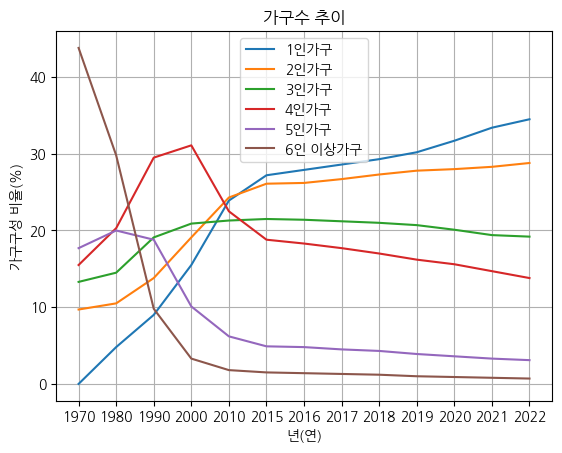

In [135]:
x=household.columns[1:]
for i in range(0,6) :
    plt.plot(range(household.shape[1]-1),list(household.iloc[i][1:].values), label=household["Unnamed: 1"][i+1])
plt.legend()
plt.title("가구수 추이")
plt.xticks(range(13), [1970,1980,1990,2000,2010,2015,2016,2017,2018,2019,2020,2021,2022])
plt.xlabel("년(연)")
plt.ylabel("가구구성 비율(%)")
plt.grid(True)
plt.show()

In [136]:
# 가구원 수는 6인 이상 가구는 더이상 존재하지 않고(0에 수렴하며), 1인~3인 가구, 즉 비교적 소규모의 가구원이 늘어나고 있는 추세이다
# 평균 가구원 2.3명 : https://blog.naver.com/wndlwndl83/223053391972
# 가구원에 따른 중위소득 추이 : https://sugarlessgum.tistory.com/538
#  ㄴ 가구원이 늘어날수록 중위소득이 증가하고 있다
income

,가계수지항목별,2019.1/4,2019.2/4,2019.3/4,2019.4/4,2020.1/4,2020.2/4,2020.3/4,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4,2023.3/4
0,가계수지항목별,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구,전체가구
1,소득,4271911,4168865,4301979,4284972,4366070,4315385,4377301,4361723,4383813,4286962,4728905,4642311,4825037,4831061,4868667,4833575,5053853,4792979,5032739


In [137]:
income.drop(index=[0], axis=0, inplace=True)
income.reset_index(drop=True, inplace=True)
for col in income.columns[1:]:
    income[col] = income[col].astype(float)

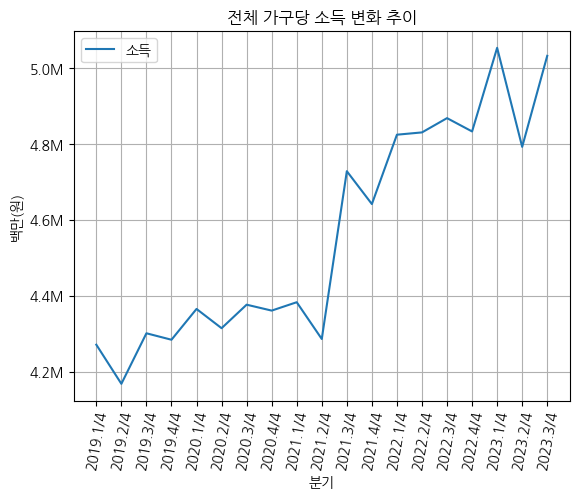

In [143]:
x=income.columns[1:]

plt.plot(range(income.shape[1]-1),list(income.iloc[0][1:].values), label=income["가계수지항목별"][0])
plt.legend()
plt.title("전체 가구당 소득 변화 추이")
plt.xticks(range(income.shape[1]-1),income.columns[1:], rotation=80)
plt.xlabel("분기")
plt.ylabel("백만(원)")
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.grid(True)
plt.show()

In [ ]:
# 즉, 소득 가구의 형태가 변화함과 동시에 전체 가구당 소득 변화가 올라가고 있음
# -> 사교육비 지출 양극화 : https://www.hidomin.com/news/articleView.html?idxno=509164
# 1~3인 가구가 증가함과 동시에 전체 가구당 소득 변화가 올라갔으므로, 사교육에 들어가는 비용이 양극화와 동시에 고조됨
# 1. 소득 수준이 높을수록 교육 수준의 중요성 인식
# 2. 대한민국에 만연해 있는 경쟁과 성과의 압박
# 3. 네트워킹과 정보 획득
# 인구 감소로 인한 사회 불신 증가 : https://news.sbs.co.kr/news/endPage.do?news_id=N1007350710